In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading and Vizualing the Data 

In [4]:
#Dataset: https://www.kaggle.com/datasets/rohankayan/years-of-experience-and-salary-dataset/versions/1?resource=download

# Read salary data into dataframe
dfs = pd.read_csv("Salary_Data.csv")
x_train = dfs['YearsExperience']
y_train = dfs['Salary']

#print data sample
print(dfs[:5])
print(type(dfs['Salary']))

m = len(dfs.axes[0])
n = len(dfs.axes[1]) - 1 #exclude target
print('Data Set number of features: {}'.format(n))
print('Data Set number of examples {}'.format(m))

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
<class 'pandas.core.series.Series'>
Data Set number of features: 1
Data Set number of examples 30


In [5]:
#Calculate data ranges
max_exp = max(dfs['YearsExperience'])
min_exp = min(dfs['YearsExperience'])
max_sal = max(dfs['Salary'])
min_sal = min(dfs['Salary'])
print('Years of experience range from {} to {}'.format(min_exp,max_exp))
print('Salary ranges from {} to {}'.format(min_sal,max_sal))

Years of experience range from 1.1 to 10.5
Salary ranges from 37731.0 to 122391.0


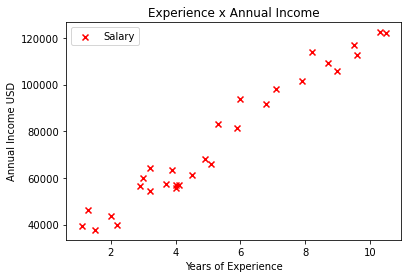

In [6]:
#Visualize data
plt.scatter(dfs['YearsExperience'],dfs['Salary'],color='r',marker='x')
plt.xlabel('Years of Experience')
plt.ylabel('Annual Income USD')
plt.title('Experience x Annual Income')
plt.legend(['Salary'])

### Cost Function

In [7]:
#calculate cost function

def compute_cost(x,y,w,b):
    '''
    Computes the cost over all examples
    Args:
      X : pandas df column vector: m examples by n features
      y : pandas df column vector: target values
      w : Scalar value of parameter of the model - Single feature      
      b : scalar values of bias parameter of the model
    Returns:
      total_cost: (scalar)         cost 
    '''
    m = len(x)
    err = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        err += (f_wb - y[i])**2
    total_cost = err * (1/2*m)
    
    return total_cost

In [8]:
#compute and display cost with parameters initialized to 0
w_temp = 0
b_temp = 0

cost = compute_cost(x_train,y_train,w_temp,b_temp)
print('cost at initial w and b (zeros): {}'.format(cost))

cost at initial w and b (zeros): 2926329871830.0


In [9]:
# predict a value

def predict(x,w,b):
    '''
    Predict values given x_train and parameters
    Args:
      x : list of features values
      w : Scalar value of parameter of the model - Single feature      
      b : scalar values of bias parameter of the model
    Returns:
      f_wb: list with predicted values
    ''' 
    f_wb = []
    for i in range(len(x)):
        f_wb.append(w*x[i] + b)
        #print(f_wb)
    return f_wb

### Computing gradient component 

In [10]:
#compute gradient for gradient descent

def compute_gradient(x,y,w,b):
    '''
    Computes the gradient for linear regression
    Args:
      X : pandas df column vector: m examples by n features
      y : pandas df column vector: target values
      w : Scalar value of parameter of the model - Single feature      
      b : scalar values of bias parameter of the model
    Returns:
      dj_dw : gradient of the cost - parameter w
      dj_db: gradient of the cost - parameter b
    '''
    m = len(x)
    dj_dw_i = 0
    dj_db_i = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i += (f_wb - y[i])*x[i]
        dj_db_i += (f_wb - y[i])
    dj_dw = dj_dw_i * (1/m)
    dj_db = dj_db_i * (1/m)
    
    return dj_dw, dj_db


In [11]:
#Compute and display gradients with initual parameteres set to zero

w_temp = 0
b_temp = 0

dj_dw, dj_db = compute_gradient(x_train,y_train,w_temp,b_temp)
print('dj_dw at initial w = 0: {}'.format(dj_dw))
print('dj_db at initial w = 0: {}'.format(dj_db))

dj_dw at initial w = 0: -477398.7
dj_db at initial w = 0: -76003.0


### Gradient Descent 

In [12]:
# find learning parameters using gradient descent

def gradient_descent(x,y,w,b,alpha,num_iter):
    
    """
    Performs batch gradient descent to learn parameters. Updates parameters by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    # Arrays to story hisory primarely for graphing
    j_history = []
    w_history = []
    b_history = []
    
    for i in range(num_iter):
        
        if i < 100000:  #prevent resource exhaustion
            cost = compute_cost(x,y,w,b)
            j_history.append(cost)
            
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        
        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Every 1000 iterations, store w and b, and print info
        if i % 1000 == 0 or i == num_iter-1:
            w_history.append(w)
            b_history.append(b)
            print('iteration: {} | Cost: {} | w: {} | b: {}'.format(i,cost,w,b))
                  
    return w, b, j_history, w_history, b_history
                  

In [13]:
intial_w = 0
initial_b = 0

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, j_history,_,_ = gradient_descent(x_train ,y_train,intial_w, initial_b, alpha, iterations)
print('Final value of w parameter: {}'.format(w))
print('Final value of b parameter: {}'.format(b))
print('Final cost value: {}'.format(cost))

iteration: 0 | Cost: 2926329871830.0 | w: 4773.987 | b: 760.03
iteration: 1000 | Cost: 14874185837.93114 | w: 9875.211344239317 | b: 22926.559902100693
iteration: 2000 | Cost: 14083545368.687643 | w: 9501.134647665855 | b: 25447.36347429806
iteration: 3000 | Cost: 14072096496.394947 | w: 9456.120141531128 | b: 25750.70428356132
iteration: 4000 | Cost: 14071930710.956594 | w: 9450.703322517506 | b: 25787.20678918266
iteration: 5000 | Cost: 14071928310.29993 | w: 9450.051489791878 | b: 25791.59931691371
iteration: 6000 | Cost: 14071928275.537216 | w: 9449.973051523748 | b: 25792.12789158385
iteration: 7000 | Cost: 14071928275.033823 | w: 9449.963612657515 | b: 25792.191497598164
iteration: 8000 | Cost: 14071928275.026546 | w: 9449.962476831877 | b: 25792.199151625675
iteration: 9000 | Cost: 14071928275.02644 | w: 9449.962340152337 | b: 25792.200072672815
iteration: 9999 | Cost: 14071928275.02644 | w: 9449.962323709777 | b: 25792.20018347487
Final value of w parameter: 9449.962323709777
F

### Visualize Model 

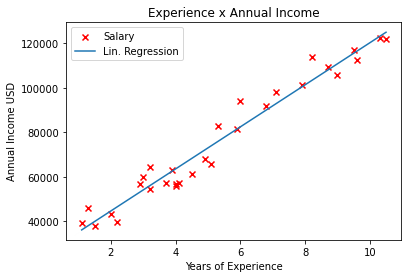

In [14]:
#Visualize linear regression model

#lin regression model using found learning parameters
f_wb = predict(x_train,w,b)

#plot
plt.scatter(dfs['YearsExperience'],dfs['Salary'],color='r',marker='x')
plt.plot(x_train,f_wb)
plt.xlabel('Years of Experience')
plt.ylabel('Annual Income USD')
plt.title('Experience x Annual Income')
plt.legend(['Salary','Lin. Regression'])


In [15]:
# predict a few values using model
print(predict([10],w,b))
print(predict([5],w,b))
print(predict([2],w,b))

[120291.82342057263]
[73042.01180202376]
[44692.12483089442]


Text(0.5, 1.0, 'Cost x Iterations')

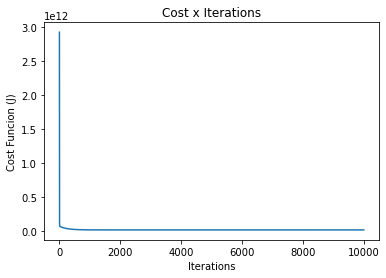

In [16]:
#visualize cost function (J) over time - should decrease
x = range(0,10000)
plt.plot(x,j_history)
plt.xlabel('Iterations')
plt.ylabel('Cost Funcion (J)')
plt.title('Cost x Iterations')

### Scikitlearn 

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression

# prepare x_train and y_train to fit model
x_train = dfs['YearsExperience']
x_train = x_train.to_numpy().reshape(-1,1)
y_train = dfs['Salary']
t_train = y_train.to_numpy().reshape(-1,1)

# scikitlearn linear regression model
reg = LinearRegression().fit(x_train,y_train)
score = reg.score(x_train,y_train)
parameters = reg.get_params(deep=True)

w = reg.coef_
b = reg.intercept_

test1 = np.array([[10]])
test2 = np.array([[5]])
test3 = np.array([[2]])
pred1 = reg.predict(test1)
pred2 = reg.predict(test2)
pred3 = reg.predict(test3)

print('Linear Regression using scikitLearn library')
print('Model parameters: {}'.format(parameters))
print('\nModel accuracy given test data: {}'.format(score))
print('\nParameter estimation for w: {}'.format(w))
print('Parameter estimation for b:{}'.format(b))
print('\n predition 1: {}'.format(pred1))
print('\n predition 2: {}'.format(pred2))
print('\n predition 3: {}'.format(pred3))

Linear Regression using scikitLearn library
Model parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}

Model accuracy given test data: 0.9569566641435086

Parameter estimation for w: [9449.96232146]
Parameter estimation for b:25792.20019866871

 predition 1: [120291.82341322]

 predition 2: [73042.01180594]

 predition 3: [44692.12484158]
